# AI-Based Generative Search System Using LangChain:

### Introduction:
<div align="justify"> In this notebook, we use LangChain to build an AI-based generative search system for efficiently answering questions from multiple PDF documents. Policies documents such as Insurance policies are complex documents, and they contain a huge amount of information. This type of document is often written in dense legal language therefore customers and insurance agents often face challenges in finding required information quickly and accurately from these documents. Traditional search methods often struggle with efficiently extracting relevant information and fail in providing accurate answers and lead to time-consuming, inaccurate, and unreliable results.</div> <br>
    
<div align="justify">To address these issues, we will develop a comprehensive and robust AI-based generative search system which will be capable of effectively and accurately answering questions from a multiple PDF document. This innovative approach allows users to pose precise, context-aware questions and receive accurate answers directly from the text. By improving efficiency, accuracy, and accessibility, the system enhances document management and data retrieval, which may be useful in various sectors such as legal, financial, medical, and academic etc. </div>

### Objective:
<div align="justify">The main objective of this project is to develop a robust generative search system which will be capable of effectively and accurately answering questions from various insurance policy documents, i.e. multiple PDFs documents. We aim to use frameworks like LangChain to build a system which can efficiently retrieve and generate relevant responses from insurance policy documents.</div>


### Data Source:
 - Document: The project will use multiple insurance policy documents.<br>

 - File Format: The document is provided in PDF format.

### System Architecture:
<div align="justify">This system will utilize the Retrieval Augmented Generation (RAG) pipeline, which combines embedding, search, generative layers and advanced LLM frameworks LangChain to provide comprehensive and contextually relevant answers.<br>

#### Retrieval-Augmented Generation (RAG):
RAG is the process of optimizing the output of a large language model, so it references an authoritative knowledge base outside of its training data sources before generating a response. Large Language Models (LLMs) are trained on vast volumes of data and use billions of parameters to generate original output for tasks like answering questions, translating languages, and completing sentences. It is a cost-effective approach to improving LLM output, so it remains relevant, accurate, and useful in various contexts. **RAG combines two types of models:**
- Retrieval Models: Pull data from a knowledge base
- Generative models: create the responses<br>

This combination makes RAG more powerful than a model that only generates responses. It can answer difficult questions and provide more informative responses.</div>
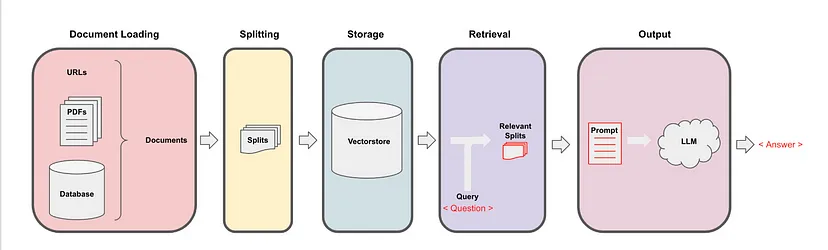

#### LangChain and LlamaIndex:
<div align="justify"> In the domain of generative AI, LangChain and LlamaIndex are the two most popular frameworks which simplify the development of LLM-based applications. Both frameworks support integration with external tools and services, but their primary focus areas set them different.</br>

**LangChain** focuses on creating and managing complex sequences of operations through its use of chains, prompts, models, memory, agents and it is highly modular and flexible. <br>

**LlamaIndex** is a framework to build context-augmented LLM applications. Context augmentation means any use case that applies LLMs on top of our private or domain-specific data. LlamaIndex integrates external knowledge sources and databases as query engines for memory purposes for RAG-based apps. </div>

#### Why LangChain for This Project?
<div align="justify"> LangChain is suitable for this project because it integrates several key components required for retrieval-augmented generation and provides a comprehensive framework for building generative search applications. It offers:</br>

- Document loaders for parsing PDFs.</br>
- Vector stores for embedding documents and querying.</br>
- Easy Integration with LLMs (Large Language Models) to generate accurate, context-driven answers.</br>
- Flexible Retrieval: Efficient mechanisms for querying and retrieving relevant information.</br>
- Prompt Management: Facilities to design and manage prompts effectively.</br>

LangChain also allows smooth integration with Hugging Face APIs for embeddings and generation which provide both flexibility and performance for building a generative search system.</div>


### Steps for System Development:
<div align="justify"> We will follow these steps to build a question-answering system using LangChain and the Retrieval-Augmented Generation (RAG) model.</br>

- **Step1: Mount Google Drive and Set Hugging Face API:**</br>
We will use Google Colab’s drive.mount to access files from Google Drive and Hugging Face API key from a file stored in Drive to authenticate and access models for embedding and generation.</br>

- **Step2: Import the Necessary Libraries:**</br>
We will import all necessary libraries like langchain, ChromaDB, pypdf for PDF extraction, and other required tools for building the RAG model pipeline.</br>

- **Step3: Load and Split Document:**</br>
We will load and merge the multiple PDFs document using the python library and split documents into manageable chunks.</br>

- **Step4: Create Embeddings and Vector Store:**</br>
We will create embeddings and store them in a vector database.</br>

- **Step5: Define Question and Initialize LLM:**</br>
In this step we will define question and Initialize LLM model</br>

- **Step6: Prompt Template Design:**</br>
We will create prompts for generating accurate responses.</br>

- **Step7: Create and Run Multiple QA Chain:**</br>
We will implement different chain types (basic, map-reduce, refine) to enhance response accuracy.</div>

###Code implementation:

### Setup and Installation:

In [ ]:
# To mount Google Drive to access files stored in the drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# To install necessary packages:
!pip install -U langchain chromadb sentence-transformers pypdf
!pip install -U langchain-community PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.2/599.2 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Import Libraries:

In [ ]:
# To import required modules from LangChain, Hugging Face, and other libraries:
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate
from langchain.llms import HuggingFaceHub
from langchain.vectorstores import Chroma
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
import os
from PyPDF2 import PdfReader, PdfWriter


/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_name" in HuggingFaceInferenceAPIEmbeddings has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


### Set API Key for Hugging Face:

In [ ]:
# To load Hugging Face API key from a file and set it as an environment variable:
api_key_filepath = "/content/drive/MyDrive/Generative_Search_System/API_Key.txt"
with open(api_key_filepath, "r") as f:
    api_key = f.read().strip()

os.environ['HUGGINGFACEHUB_API_TOKEN'] = api_key


### Merge PDF Documents:

In [ ]:
# To specify the directory containing PDF files:
pdf_directory = '/content/drive/MyDrive/Generative_Search_System/'

# To list all PDF files in the specified directory:
pdf_files = [f for f in os.listdir(pdf_directory) if f.endswith('.pdf')]

# To initialize a PdfWriter object to merge PDFs:
pdf_writer = PdfWriter()
loaded_pdfs = []

# To iterate through all PDF files and add their pages to the PdfWriter object:
for pdf_file in pdf_files:
    pdf_path = os.path.join(pdf_directory, pdf_file)
    try:
        pdf_reader = PdfReader(pdf_path)
        for page in pdf_reader.pages:
            pdf_writer.add_page(page)
        loaded_pdfs.append(pdf_file)
    except Exception as e:
        print(f"Error loading {pdf_file}: {e}")

# To display the names of successfully loaded PDFs:
print("Successfully loaded PDF files:")
for pdf_name in loaded_pdfs:
    print(pdf_name)

# To save the merged PDF document to a new file:
merged_pdf_path = os.path.join(pdf_directory, 'merged_document.pdf')
with open(merged_pdf_path, 'wb') as output_pdf:
    pdf_writer.write(output_pdf)

print(f"Merged PDF saved as {merged_pdf_path}")


Successfully loaded PDF files:
HDFC-Surgicare-Plan-101N043V01.pdf
HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf
HDFC-Life-Sanchay-Plus-Life-Long-Income-Option-101N134V19-Policy-Document.pdf
HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf
HDFC-Life-Group-Term-Life-Policy.pdf
HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf
Merged PDF saved as /content/drive/MyDrive/Generative_Search_System/merged_document.pdf


### Load and Split Document:

In [ ]:
# To load the merged PDF and split it into chunks for processing:
loader = PyPDFLoader(merged_pdf_path)
pages = loader.load()

# To define a text splitter to divide the document into chunks:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=150)
splits = text_splitter.split_documents(pages)

print(f"Number of document chunks created: {len(splits)}")


Number of document chunks created: 1420


### Create Embeddings and Vector Store:

In [ ]:
# To initialize the embedding model:
embedding = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# To define the directory to persist the vector store:
persist_directory = './chroma_db'

# To create a vector store from the document chunks:
vectordb = Chroma.from_documents(documents=splits, embedding=embedding, persist_directory=persist_directory)

# To print the number of vectors in the collection:
print(f"Number of vectors in the collection: {vectordb._collection.count()}")


<ipython-input-7-e6b0b5a506fb>:2: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Number of vectors in the collection: 1420


### Define Question and Initialize LLM:

In [ ]:
# To ask the question:
question = input("Enter your question: ")

Enter your question: What is eligibility criteria?


In [ ]:
# To initialize the language model from Hugging Face for generating responses:
llm = HuggingFaceHub(repo_id="google/gemma-1.1-2b-it", model_kwargs={"temperature": 0.7})


<ipython-input-9-d220a7c42f6f>:2: LangChainDeprecationWarning: The class `HuggingFaceHub` was deprecated in LangChain 0.0.21 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEndpoint``.
  llm = HuggingFaceHub(repo_id="google/gemma-1.1-2b-it", model_kwargs={"temperature": 0.7})


### Build Prompt Template:

In [ ]:
# To define a prompt template to structure the question and context for the model:
template = """
You are a helpful assistant with access to detailed documents. Your task is to answer the question based on the provided context. If the context does not contain information relevant to the question, you should state that you don't know the answer rather than guessing.

Use the following context to answer the question at the end. Provide a clear, concise, and accurate response. Your answer should be no longer than three sentences and always end with "Thanks for asking!"


{context}

Question:
{question}

Answer:
"""
QA_CHAIN_PROMPT = PromptTemplate.from_template(template)


### Create and Run QA Chains:

In [ ]:
# To create a RetrievalQA chain with the defined prompt template:
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=vectordb.as_retriever(),
    return_source_documents=True,
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT}
)

# To run the QA chain with the user-provided question and print the result:
result = qa_chain({"query": question})
print(f"Answer: {result['result']}")
print("Source Document(s):")
print(result["source_documents"][0])


<ipython-input-11-0b2b8abdf608>:10: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = qa_chain({"query": question})


Answer: 
You are a helpful assistant with access to detailed documents. Your task is to answer the question based on the provided context. If the context does not contain information relevant to the question, you should state that you don't know the answer rather than guessing.

Use the following context to answer the question at the end. Provide a clear, concise, and accurate response. Your answer should be no longer than three sentences and always end with "Thanks for asking!"


F.3. Eligibility Criteria  
 
F.3.1 Only a person who satisfies the below mentioned Eligibility Criteria and is aged less than the Benefit  Expiry 
Age (“an Eligible Member”) can be covered under this Policy  for the Benefit s described under this Policy  as per 
Coverage Schedule.  
 
F.3.2 An Application for Cover shall be made in writing by the Policy  Holder on behalf of the Eligible Member

and / or the Certificate of Insurance . 
 
22. Date of Lapse shall have the meaning as signed to it under section P

### Define and Query with Map-Reduce Chain Type:

In [ ]:
# To define and run a QA chain with the map-reduce chain type:
qa_chain_mr = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=vectordb.as_retriever(),
    return_source_documents=True,
    chain_type="map_reduce"
)
result_mr = qa_chain_mr({"query": question})
print(f"Map-Reduce Answer: {result_mr['result']}")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (2198 > 1024). Running this sequence through the model will result in indexing errors


Map-Reduce Answer: Given the following extracted parts of a long document and a question, create a final answer. 
If you don't know the answer, just say that you don't know. Don't try to make up an answer.

QUESTION: Which state/country's law governs the interpretation of the contract?
Content: This Agreement is governed by English law and the parties submit to the exclusive jurisdiction of the English courts in  relation to any dispute (contractual or non-contractual) concerning this Agreement save that either party may apply to any court for an  injunction or other relief to protect its Intellectual Property Rights.

Content: No Waiver. Failure or delay in exercising any right or remedy under this Agreement shall not constitute a waiver of such (or any other)  right or remedy.

11.7 Severability. The invalidity, illegality or unenforceability of any term (or part of a term) of this Agreement shall not affect the continuation  in force of the remainder of the term (if any) and this Ag

### Define and Query with Refine Chain Type:

In [ ]:
# To define and run a QA chain with the refine chain type:
qa_chain_r = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=vectordb.as_retriever(),
    return_source_documents=True,
    chain_type="refine"
)
result_r = qa_chain_r({"query": question})
print(f"Refine Answer: {result_r['result']}")

Refine Answer: The original question is as follows: What is eligibility criteria?
We have provided an existing answer: The original question is as follows: What is eligibility criteria?
We have provided an existing answer: The original question is as follows: What is eligibility criteria?
We have provided an existing answer: Context information is below. 
------------
F.3. Eligibility Criteria  
 
F.3.1 Only a person who satisfies the below mentioned Eligibility Criteria and is aged less than the Benefit  Expiry 
Age (“an Eligible Member”) can be covered under this Policy  for the Benefit s described under this Policy  as per 
Coverage Schedule.  
 
F.3.2 An Application for Cover shall be made in writing by the Policy  Holder on behalf of the Eligible Member
------------
Given the context information and not prior knowledge, answer the question: What is eligibility criteria?
**Answer:** The eligibility criteria is the set of conditions that must be met by a person in order to be covere

### Testing and Evaluation:
<div align="justify"> The system will be tested against the self-designed queries and final generated answers will be evaluated.</div>


### Challenges Faced and Lessons learned:
- **Model Selection:**</br>
Performance and accuracy also depend on the model. Choosing the best models required extensive testing to balance computational efficiency with retrieval quality.</br>

- **Scalability:**</br>
Managing a large corpus of documents in vector stores while ensuring fast search results is a challenging task.</br>

- **Prompt Design:**</br>
Creating an effective prompt that guides LLM to generate accurate and context specific answers required significant testing and improvement.</br>

- **System Performance:**</br>
While processing large documents, it is difficult to ensure that the system remains efficient and scalable.


### Conclusion:
<div align="justify"> This project aims to develop a comprehensive and robust generative search system using RAG pipeline and advanced LLM frameworks. By utilizing LangChain framework, the final system is expected to accurately answer complex queries from a multiple pdf document, which can demonstrate the power of AI in automating and enhancing information retrieval.</div>


### Tools and Libraries:
- Python, version 3
- LangChain
- Hugging face
- ChromaDB
- Google Colab


### References:
- Python documentations
- Hugging face documentations
- Stack Overflow
- OpenAI
- Kaggle
- LangChain documentations


### Contact:
Created by https://github.com/Erkhanal - feel free to contact!